In [26]:
import json
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [10]:
PATH = "../../../"

In [11]:
categories = [
    {"id": 0, "name": "bird"},
    {"id": 1, "name": "actitis hypoleucos"},
    {"id": 2, "name": "anthus pratensis"},
    {"id": 3, "name": "calandrella brachydactyla"},
    {"id": 4, "name": "carduelis carduelis"},
    {"id": 5, "name": "cettia cetti"},
    {"id": 6, "name": "chloris chloris"},
    {"id": 7, "name": "ciconia ciconia"},
    {"id": 8, "name": "cisticola juncidis"},
    {"id": 9, "name": "curruca"},
    {"id": 10, "name": "emberiza calandra"},
    {"id": 11, "name": "erithacus rubecula"},
    {"id": 12, "name": "fringilla"},
    {"id": 13, "name": "galerida"},
    {"id": 14, "name": "lanius"},
    {"id": 15, "name": "luscinia megarhynchos"},
    {"id": 16, "name": "merops apiaster"},
    {"id": 17, "name": "motacilla"},
    {"id": 18, "name": "parus major"},
    {"id": 19, "name": "passer"},
    {"id": 20, "name": "pica pica"},
    {"id": 21, "name": "saxicola rubicola"},
    {"id": 22, "name": "serinus serinus"},
    {"id": 23, "name": "streptopelia decaocto"},
    {"id": 24, "name": "sturnus"},
    {"id": 25, "name": "turdus merula"},
]

In [12]:
# Variables
THRESHOLD = 0.4

In [17]:
# Cargar el archivo JSON de predicciones
with open('../runs/detect/val7/predictions.json', 'r') as json_file:
    predictions = json.load(json_file)

# Cargar el archivo de rutas de imágenes
with open(PATH + 'desarrollo/Data/Dataset/TXTs/test.txt', 'r') as txt_file:
    image_paths = txt_file.readlines()
    image_paths = [path.strip() for path in image_paths]

In [18]:
def denormalize_bbox(bbox, image_width, image_height):
    x_center, y_center, width, height = bbox
    x_min = int((x_center - width / 2) * image_width)
    y_min = int((y_center - height / 2) * image_height)
    x_max = int((x_center + width / 2) * image_width)
    y_max = int((y_center + height / 2) * image_height)
    return x_min, y_min, x_max, y_max

{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [437.911, 68.852, 4.999, 28.881], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [18.996, 30.87, 38.992, 98.95], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [544.889, 81.403, 121.975, 26.603], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [662.866, 69.552, 31.993, 36.302], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [694.859, 75.081, 234.952, 52.518], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [482.902, 30.87, 4.999, 80.154], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [447.909, 30.87, 2.999, 55.619], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [404.918, 56.434, 2.999, 28.989], 'score': 1.0}
{'image_id': 'AM16_20230303_083000', 'category_id': 0, 'bbox': [311.937, 98.854, 5.999, 30.509], 'score': 1.0}


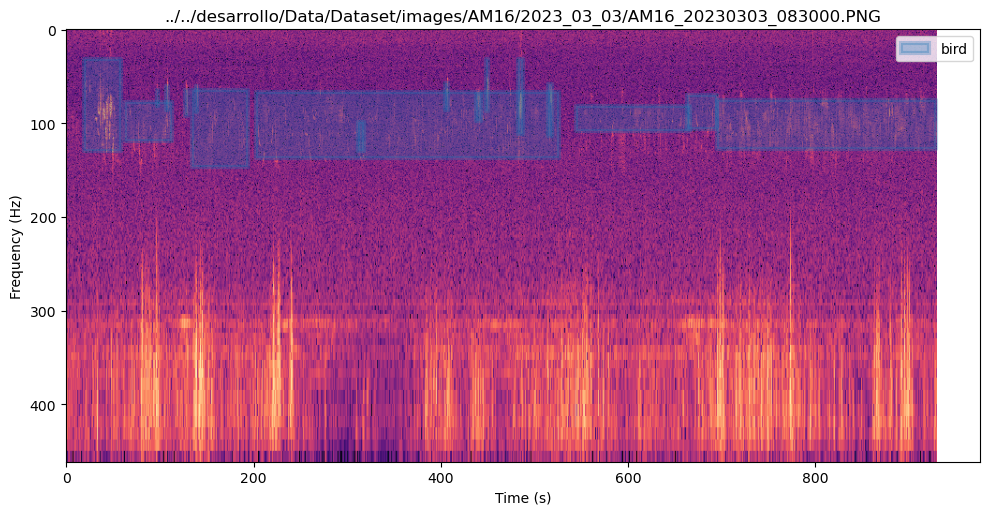

In [39]:
# Escoger una imagen aleatoria
random_image_path = random.choice(image_paths)
image_id = random_image_path.split('/')[-1].replace('.PNG', '')

# Filtrar las predicciones para la imagen seleccionada y con score > THRESHOLD
filtered_predictions = [pred for pred in predictions if pred['image_id'] == image_id and pred['score'] > THRESHOLD]

# Mostrar la imagen y sus bounding boxes
fig, ax = plt.subplots(figsize=(10, 8))
img = plt.imread("../" + random_image_path)
ax.imshow(img)

# Título de la imagen con el path completo
plt.title(random_image_path, fontsize=12)

# Create a dictionary to map labels to colors
label_to_color = {}

for pred in filtered_predictions:
    category_id = pred['category_id']
    label = categories[category_id]['name']
    bbox = pred['bbox']

    if label not in label_to_color:
        label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
    color = label_to_color[label]
    ax.fill_between([bbox[0], bbox[0] + bbox[2]], bbox[1], bbox[1] + bbox[3], alpha=0.3, label=label, color=color, linewidth=3)

    print(pred)

# Configure plot settings
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="best")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')

# Show the plot
plt.tight_layout()
plt.show()